In [299]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [300]:
np.random.seed(42)


In [301]:
df = pd.read_csv('Данные.csv', sep=';')

In [302]:
df.head()

,k,lu,P0,I,gamma,sgamma,r,Psat,Lsat,loptim,lres,loptim/lres,Psat/Pall,Lsat/lu,f,rho,P0/Pall
0,3.89,3.69,12800000.0,80.0,2650.0,0.0,0.0001,1.430000e+08,18.5,2.261250e-08,2.257770e-08,0.001542,0.00132,5.01,0.736,0.000965,1.180000e-04
1,3.89,3.69,12800.0,80.0,1000.0,0.0,0.0001,9.800000e+07,16.7,1.585280e-07,1.580440e-07,0.003065,0.00240,4.52,0.736,0.002550,3.130000e-07
2,3.98,3.69,150000.0,500.0,2830.0,0.0,0.0001,1.130000e+09,20.3,2.061380e-08,2.057220e-08,0.002024,0.00156,5.49,0.735,0.001690,2.070000e-07
3,3.98,3.69,1500000.0,500.0,3160.0,0.0,0.0001,1.100000e+09,18.3,1.648760e-08,1.645770e-08,0.001814,0.00136,4.96,0.735,0.001510,1.850000e-06
4,3.98,3.69,150000.0,500.0,2650.0,0.0,0.0001,1.180000e+09,19.4,2.356200e-08,2.351110e-08,0.002164,0.00175,5.25,0.735,0.001800,2.210000e-07


In [303]:
df = df.dropna()

Look at the power distribution. 

Text(0.5, 1.0, 'Power hist')

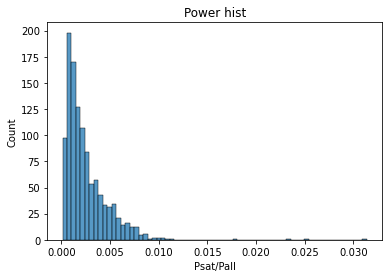

In [304]:
sns.histplot(df, x='Psat/Pall')
plt.title("Power hist")

Delete all the blowout(rho>0.012) 

In [305]:
df = df[df['Psat/Pall']<0.012]

Create a new feature log(Psat/Pall)

In [306]:
df['log'] = np.log(df[['Psat/Pall']])

In [307]:
df['log0'] = np.log(df['P0']/df['I']/df['gamma']/511000)

Text(0.5, 1.0, 'Power hist')

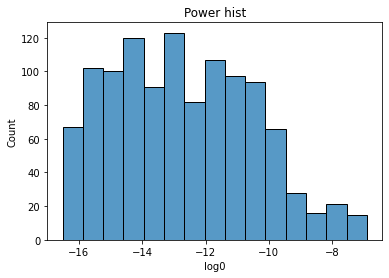

In [308]:
sns.histplot(df, x='log0')
plt.title("Power hist")

Text(0.5, 1.0, 'Power hist')

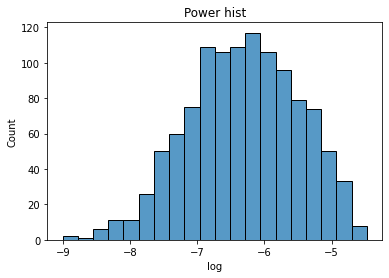

In [309]:
sns.histplot(df, x='log')
plt.title("Power hist")

Text(0.5, 1.0, 'L_sat hist')

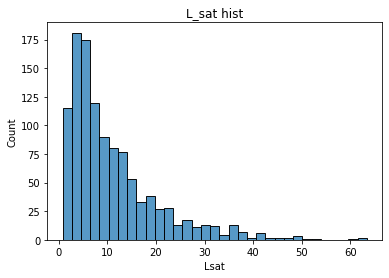

In [310]:
sns.histplot(df, x='Lsat')
plt.title("L_sat hist")

Text(0.5, 1.0, 'L_sat hist')

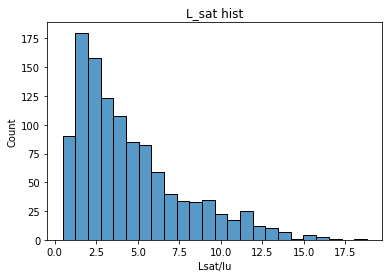

In [311]:
sns.histplot(df, x='Lsat/lu')
plt.title("L_sat hist")

Text(0.5, 1.0, 'lambda')

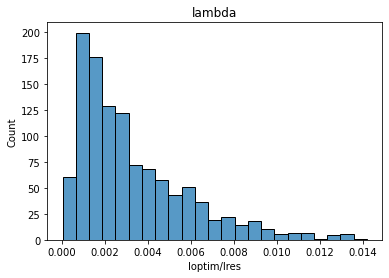

In [312]:
sns.histplot(df, x='loptim/lres')
plt.title("lambda")

Text(0.5, 1.0, 'rho')

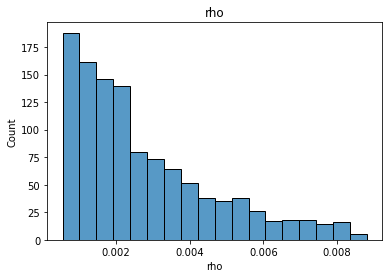

In [313]:
sns.histplot(df, x='rho')
plt.title("rho")

<AxesSubplot:xlabel='optim', ylabel='Count'>

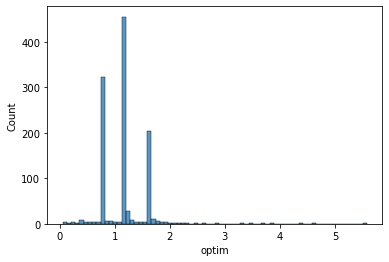

In [314]:
df['optim'] = df['loptim/lres']/df['rho']
sns.histplot(df, x='optim')



In [315]:
df = df[df['optim']<2]

In [316]:
df1 = df.drop(columns=['P0', 'optim', 'P0/Pall', 'Psat', 'Lsat', 'loptim','lres', 'loptim/lres', 'Psat/Pall', 'Lsat/lu', 'f', 'rho', 'log'])

In [317]:
df1.tail()

,k,lu,I,gamma,sgamma,r,log0
1128,1.15,3.80,60.0,1000.0,0.0005,0.00005,-10.797523
1129,2.38,3.80,800.0,8940.0,0.0005,0.00005,-11.639550
1130,3.79,3.80,600.0,3160.0,0.0005,0.00005,-12.688598
1131,1.67,3.67,700.0,707.0,0.0005,0.00005,-14.010943
1132,1.67,3.67,700.0,775.0,0.0005,0.00005,-11.800190


In [318]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df1, df['log'], test_size=0.2, random_state=42)

In [319]:
from sklearn.metrics import mean_absolute_percentage_error

clf1 = RandomForestRegressor(max_depth=20, random_state=0)
clf1.fit(X_train, y_train)
mean_absolute_percentage_error(np.exp(y_test), np.exp(clf1.predict(X_test)))

0.23796141077879504

Try to scale the data. It doesn't make sense. 

In [320]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 

clf = RandomForestRegressor(max_depth=20, random_state=0)
clf.fit(X_train, y_train)
mean_absolute_percentage_error(np.exp(y_test), np.exp(clf.predict(X_test)))

0.23964129505051965

Train the classificator for the saturation length.

In [321]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Lsat/lu'], test_size=0.2, random_state=42)


clf2 = RandomForestRegressor(max_depth=20, random_state=0)
clf2.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, clf2.predict(X_test))

0.1586336836535758

The classificator for the optimum wavelength.

In [322]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['optim'], test_size=0.2, random_state=42)



clf3 = RandomForestRegressor(max_depth=20, random_state=0)
clf3.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, clf3.predict(X_test))

0.2642061066369756

In [323]:
from scipy.special import jv

X = pd.DataFrame({'k':[2.13], 'lu':[2.8], 'I':[53], 'gamma':[300], 'sgamma':[0.0002], 
                  'r':[0.00012], 'log0':[2000]})

ksi = X['k']**2/(1+X['k']**2/2)/4
f = jv(0,ksi)-jv(1,ksi)

rho = 1/2/(X['gamma'])*(X['I']/X['r']**2/np.pi/4/np.pi/17000*(X['lu']/100*X['k']*f)**2)**(1/3)
X['log0'] = np.log(X['log0']/X['I']/X['gamma']/511000)


print('P_sat=', (np.exp(clf1.predict(X))*X['gamma']*511000*X['I'])[0])
print('L_sat=', (clf2.predict(X)*X['lu'])[0])
print('l_optim=', ((clf3.predict(X)*rho+1)*X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])
print('l_res=', (X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])

P_sat= 15312332.04510284
L_sat= 14.882559999999996
l_optim= 5.107559582429715e-07
l_res= 5.084255555555554e-07


In [324]:
y_pred = clf1.predict(df1)
err = abs(2*(np.exp(y_pred)-df['Psat/Pall'])/(np.exp(y_pred)+df['Psat/Pall']))
err.sort_values()

1009    0.000041
976     0.000125
928     0.000145
746     0.000195
783     0.000242
          ...   
548     0.902833
524     0.952413
873     1.031374
604     1.194437
886     1.351663
Name: Psat/Pall, Length: 1109, dtype: float64

In [325]:
y_pred = clf2.predict(df1)
err = abs(2*(y_pred-df['Lsat'])/(y_pred+df['Lsat']))
err.sort_values()

771     0.001571
422     0.001957
643     0.002815
949     0.003877
601     0.004939
          ...   
1099    1.277567
431     1.279848
496     1.287771
432     1.292844
436     1.378529
Name: Lsat, Length: 1109, dtype: float64

In [326]:
y_pred = clf3.predict(df1)
err = abs(2*(y_pred-df['optim'])/(y_pred+df['optim']))
err.sort_values()

112    0.000106
839    0.000112
169    0.000237
191    0.000242
111    0.000261
         ...   
464    1.110272
790    1.470281
681    1.505031
705    1.642517
686    1.727820
Name: optim, Length: 1109, dtype: float64

Do the same with gradient boosting. 

In [327]:
import optuna
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from IPython.display import clear_output

In [328]:
def objective(trial, X_train, y_train, X_test, y_test):
    """Define the objective function"""

    params = {
        'max_depth': trial.suggest_int('max_depth', 1, 30),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.1, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 500),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
        'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
        'eval_metric': 'rmse',
        'use_label_encoder': False
    }

    # Fit the model
    optuna_model = xgb.XGBRegressor(**params)
    optuna_model.fit(X_train, y_train)

    # Make predictions
    y_pred = optuna_model.predict(X_test)

    # Evaluate predictions
    accuracy = mean_squared_error(y_test, y_pred)
    return accuracy


def objective_cv(trial):
    fold = KFold(n_splits=3, shuffle=True, random_state=0)
    scores = []
    for i, (train_index, test_index) in enumerate(fold.split(X)):
        scores.append(objective(trial, X.iloc[train_index], y.iloc[train_index],  
                                X.iloc[test_index], y.iloc[test_index]))
        
    return np.mean(scores)
    

In [329]:
X = df1
y = df['log']


In [330]:
study = optuna.create_study(direction='minimize')


[I 2023-03-09 13:01:29,612] A new study created in memory with name: no-name-7871ce3c-c81a-4983-b5aa-e5a9b8240c4e


In [331]:
study.optimize(objective_cv, n_trials=300)
clear_output()


In [332]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))


Number of finished trials: 300
Best trial:
  Value: 0.05236555744584311
  Params: 
    max_depth: 2
    learning_rate: 0.2462866226242067
    n_estimators: 427
    min_child_weight: 1
    gamma: 0.00021998413973061174
    subsample: 0.6573215476207614
    colsample_bytree: 0.9366616107200104
    reg_alpha: 0.00023464827025715878
    reg_lambda: 0.017535087415992096


In [333]:
params = trial.params
model1 = xgb.XGBRegressor(**params)

In [334]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['log'], test_size=0.2, random_state=42)
model1.fit(X_train,y_train)

mean_absolute_percentage_error(np.exp(y_test), np.exp(model1.predict(X_test)))

0.1794384176585585

In [335]:
X = df1
y = df['Lsat/lu']

In [336]:
study = optuna.create_study(direction='minimize')

[I 2023-03-09 13:02:56,675] A new study created in memory with name: no-name-d54f3f8e-df35-41a3-b836-ef6bd8e47356


In [337]:
study.optimize(objective_cv, n_trials=300)
clear_output()


In [338]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 300
Best trial:
  Value: 0.48570492941835813
  Params: 
    max_depth: 2
    learning_rate: 0.4205022938859821
    n_estimators: 477
    min_child_weight: 9
    gamma: 2.647391339009773e-07
    subsample: 0.73336201081838
    colsample_bytree: 0.7061674871241089
    reg_alpha: 1.8290199723778425e-08
    reg_lambda: 0.0003767610870797067


In [339]:
params = trial.params
model2 = xgb.XGBRegressor(**params)

In [340]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['Lsat/lu'], test_size=0.2, random_state=42)

In [341]:
model2.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, model2.predict(X_test))

0.17620834822727624

In [342]:
X = df1
y = df['optim']

In [343]:
study = optuna.create_study(direction='minimize')

[I 2023-03-09 13:04:33,419] A new study created in memory with name: no-name-eb1f8d12-847f-42ec-8027-7a9d051e9105


In [344]:
study.optimize(objective_cv, n_trials=300)
clear_output()


In [345]:
print('Number of finished trials: {}'.format(len(study.trials)))
print('Best trial:')
trial = study.best_trial

print('  Value: {}'.format(trial.value))
print('  Params: ')

for key, value in trial.params.items():
    print('    {}: {}'.format(key, value))

Number of finished trials: 300
Best trial:
  Value: 0.0769830155875863
  Params: 
    max_depth: 2
    learning_rate: 0.1601038679542079
    n_estimators: 121
    min_child_weight: 3
    gamma: 4.734523710734847e-07
    subsample: 0.5134175185577875
    colsample_bytree: 0.019797669272564093
    reg_alpha: 0.00022640462613911488
    reg_lambda: 3.412654692219869e-08


In [346]:
params = trial.params
model3 = xgb.XGBRegressor(**params)

In [347]:
X_train, X_test, y_train, y_test = train_test_split(df1, df['optim'], test_size=0.2, random_state=42)

In [348]:
model3.fit(X_train, y_train)
mean_absolute_percentage_error(y_test, model3.predict(X_test))

0.26867020329908076

In [349]:
from scipy.special import jv

X = pd.DataFrame({'k':[2.13], 'lu':[2.8], 'I':[53], 'gamma':[300], 'sgamma':[0.0002], 
                  'r':[0.00012], 'log0':[2000]})

ksi = X['k']**2/(1+X['k']**2/2)/4
f = jv(0,ksi)-jv(1,ksi)

rho = 1/2/(X['gamma'])*(X['I']/X['r']**2/np.pi/4/np.pi/17000*(X['lu']/100*X['k']*f)**2)**(1/3)
X['log0'] = np.log(X['log0']/X['I']/X['gamma']/511000)




print('P_sat=', (np.exp(model1.predict(X))*X['gamma']*511000*X['I'])[0])
print('L_sat=', (model2.predict(X)*X['lu'])[0])
print('l_optim=', ((model3.predict(X)*rho+1)*X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])
print('l_res=', (X['lu']/100/2/X['gamma']/X['gamma']*(1+X['k']*X['k']/2))[0])

P_sat= 23655169.10108272
L_sat= 12.346325302124022
l_optim= 5.106433892622312e-07
l_res= 5.084255555555554e-07


In [350]:
len(df)

1109